# AR6 WG1 - SPM.4

This notebook reproduces the panel a) of **Figure SPM.4** of the IPCC's *Working Group I contribution to the Sixth Assessment Report* ([AR6 WG1](https://www.ipcc.ch/assessment-report/ar6/)).

The data supporting the SPM figure is published under a Creative Commons CC-BY license at 
the [Centre for Environmental Data Analyis (CEDA)](https://catalogue.ceda.ac.uk/uuid/ae4f1eb6fce24adcb92ddca1a7838a5c).

This notebook uses a version of that data which was processed for interoperability with the format used by IPCC WG3, the so-called IAMC format.  
The notebook is available under an open-source [BSD-3 License](https://github.com/openscm/AR6-WG1-Data-Compilation/blob/main/LICENSE) in the [openscm/AR6-WG1-Data-Compilation](https://github.com/openscm/AR6-WG1-Data-Compilation) GitHub repository.

The notebook uses the community Python package [scmdata](https://scmdata.readthedocs.io), which is designed to handle simple climate model data but generalises to handle all sorts of timeseries-based data including data in the IAMC format. While it is primarily a data handling package and not a plotting package, scmdata does offer some convenient plotting functions which we use in these notebooks alongside [seaborn](https://seaborn.pydata.org) and native [matplotlib](https://matplotlib.org/) as required.

In [1]:
import matplotlib.pyplot as plt
import pyam
import scmdata
import yaml

import utils

<IPython.core.display.Javascript object>

In [2]:
plt.rcParams["axes.xmargin"] = 0
plt.rcParams["figure.figsize"] = (12, 8)

In [3]:
with open("plotting.yaml") as fh:
    palette = yaml.safe_load(fh)["color"]["scenario"]
    
palette = {k: pyam.plotting.PYAM_COLORS[v] for k, v in palette.items()}
palette

{'SSP1-1.9': '#00a9cf',
 'SSP1-2.6': '#003466',
 'SSP2-4.5': '#f69320',
 'SSP3-7.0': '#df0000',
 'SSP5-8.5': '#980002'}

In [4]:
input_file = utils.DATA_DIR / "processed" / "fig-spm4" / "fig-spm4-timeseries.csv"
input_file

PosixPath('/Users/znicholls/Documents/AGCEC/MCastle/ar6-wg1-data-compilation/data/processed/fig-spm4/fig-spm4-timeseries.csv')

In [5]:
data = scmdata.ScmRun(str(input_file))
data.head()

time                                            2015-01-01  2020-01-01  \
model region scenario unit       variable                                
IAMs  World  SSP1-1.9 GtCO2 / yr Emissions|CO2   39.152726   39.693726   
             SSP1-2.6 GtCO2 / yr Emissions|CO2   39.152726   39.804013   
             SSP2-4.5 GtCO2 / yr Emissions|CO2   39.152726   40.647530   
             SSP3-7.0 GtCO2 / yr Emissions|CO2   39.152726   44.808038   
             SSP5-8.5 GtCO2 / yr Emissions|CO2   39.152726   43.712349   

time                                            2030-01-01  2040-01-01  \
model region scenario unit       variable                                
IAMs  World  SSP1-1.9 GtCO2 / yr Emissions|CO2   22.847271   10.475089   
             SSP1-2.6 GtCO2 / yr Emissions|CO2   34.734424   26.509183   
             SSP2-4.5 GtCO2 / yr Emissions|CO2   43.476063   44.252900   
             SSP3-7.0 GtCO2 / yr Emissions|CO2   52.847359   58.497970   
             SSP5-8.5 GtCO2 / yr Emissions|CO2   55.296583   68.775698   

time                                            2050-01-01  2060-01-01  \
model region scenario unit       variable                                
IAMs  World  SSP1-1.9 GtCO2 / yr Emissions|CO2    2.050362   -1.525978   
             SSP1-2.6 GtCO2 / yr Emissions|CO2   17.963539   10.527979   
             SSP2-4.5 GtCO2 / yr Emissions|CO2   43.462190   40.196485   
             SSP3-7.0 GtCO2 / yr Emissions|CO2   62.904059   66.568368   
             SSP5-8.5 GtCO2 / yr Emissions|CO2   83.298220  100.338606   

time                                            2070-01-01  2080-01-01  \
model region scenario unit       variable                                
IAMs  World  SSP1-1.9 GtCO2 / yr Emissions|CO2   -4.476970   -7.308783   
             SSP1-2.6 GtCO2 / yr Emissions|CO2    4.476328   -3.285043   
             SSP2-4.5 GtCO2 / yr Emissions|CO2   35.235434   26.838373   
             SSP3-7.0 GtCO2 / yr Emissions|CO2   70.041979   73.405226   
             SSP5-8.5 GtCO2 / yr Emissions|CO2  116.805249  129.647035   

time                                            2090-01-01  2100-01-01  
model region scenario unit       variable                               
IAMs  World  SSP1-1.9 GtCO2 / yr Emissions|CO2  -10.565023  -13.889788  
             SSP1-2.6 GtCO2 / yr Emissions|CO2   -8.385183   -8.617786  
             SSP2-4.5 GtCO2 / yr Emissions|CO2   16.324392    9.682859  
             SSP3-7.0 GtCO2 / yr Emissions|CO2   77.799049   82.725833  
             SSP5-8.5 GtCO2 / yr Emissions|CO2  130.576239  126.287310

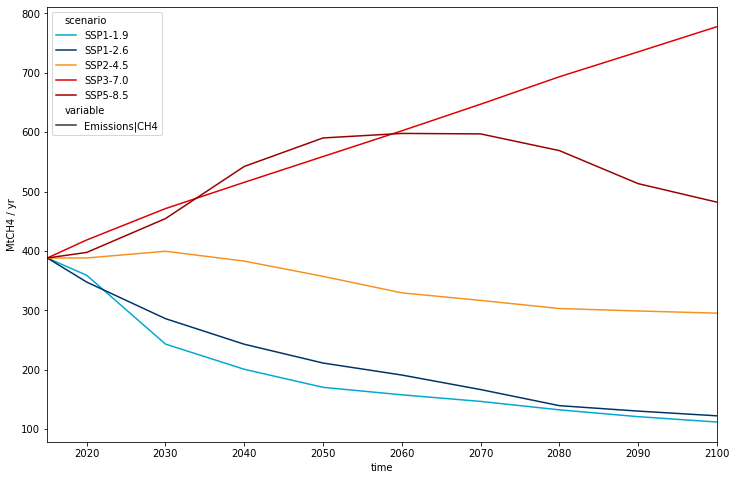

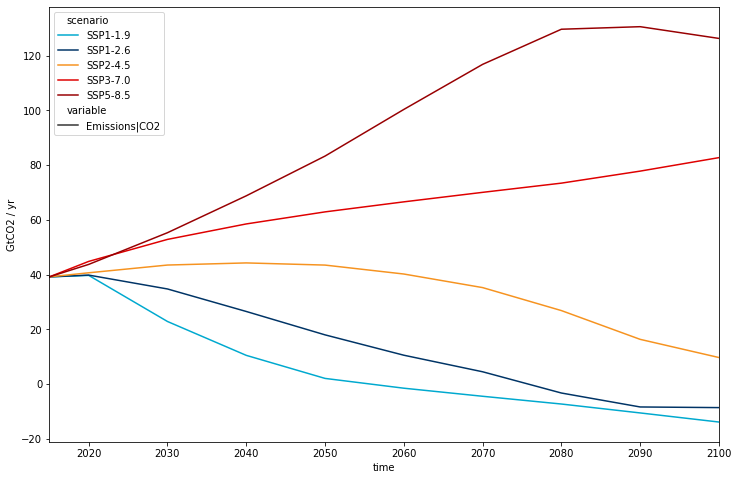

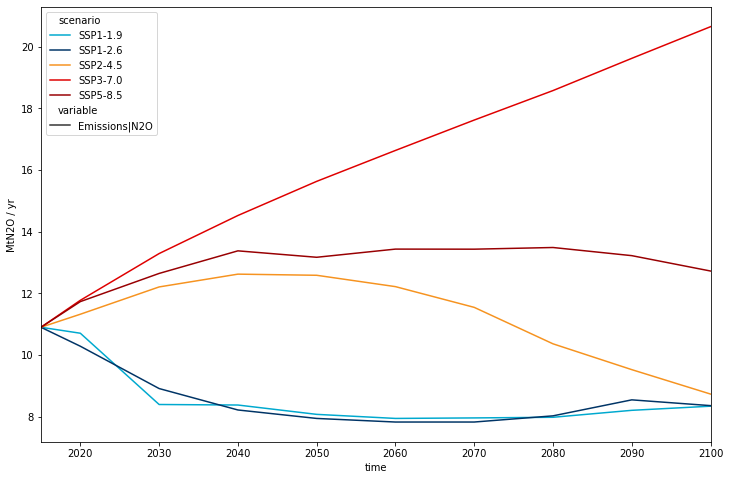

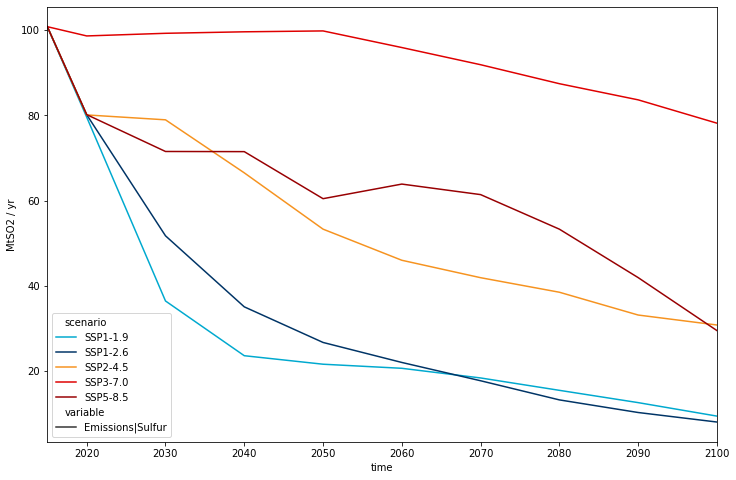

In [6]:
for vdf in data.groupby("variable"):
    vdf.lineplot(
        hue="scenario", palette=palette, style="variable"
    )
    plt.show()